In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [6]:
df=pd.get_dummies(df,columns=['Urban','US'], drop_first=True)

In [7]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,3,50,12,1,1


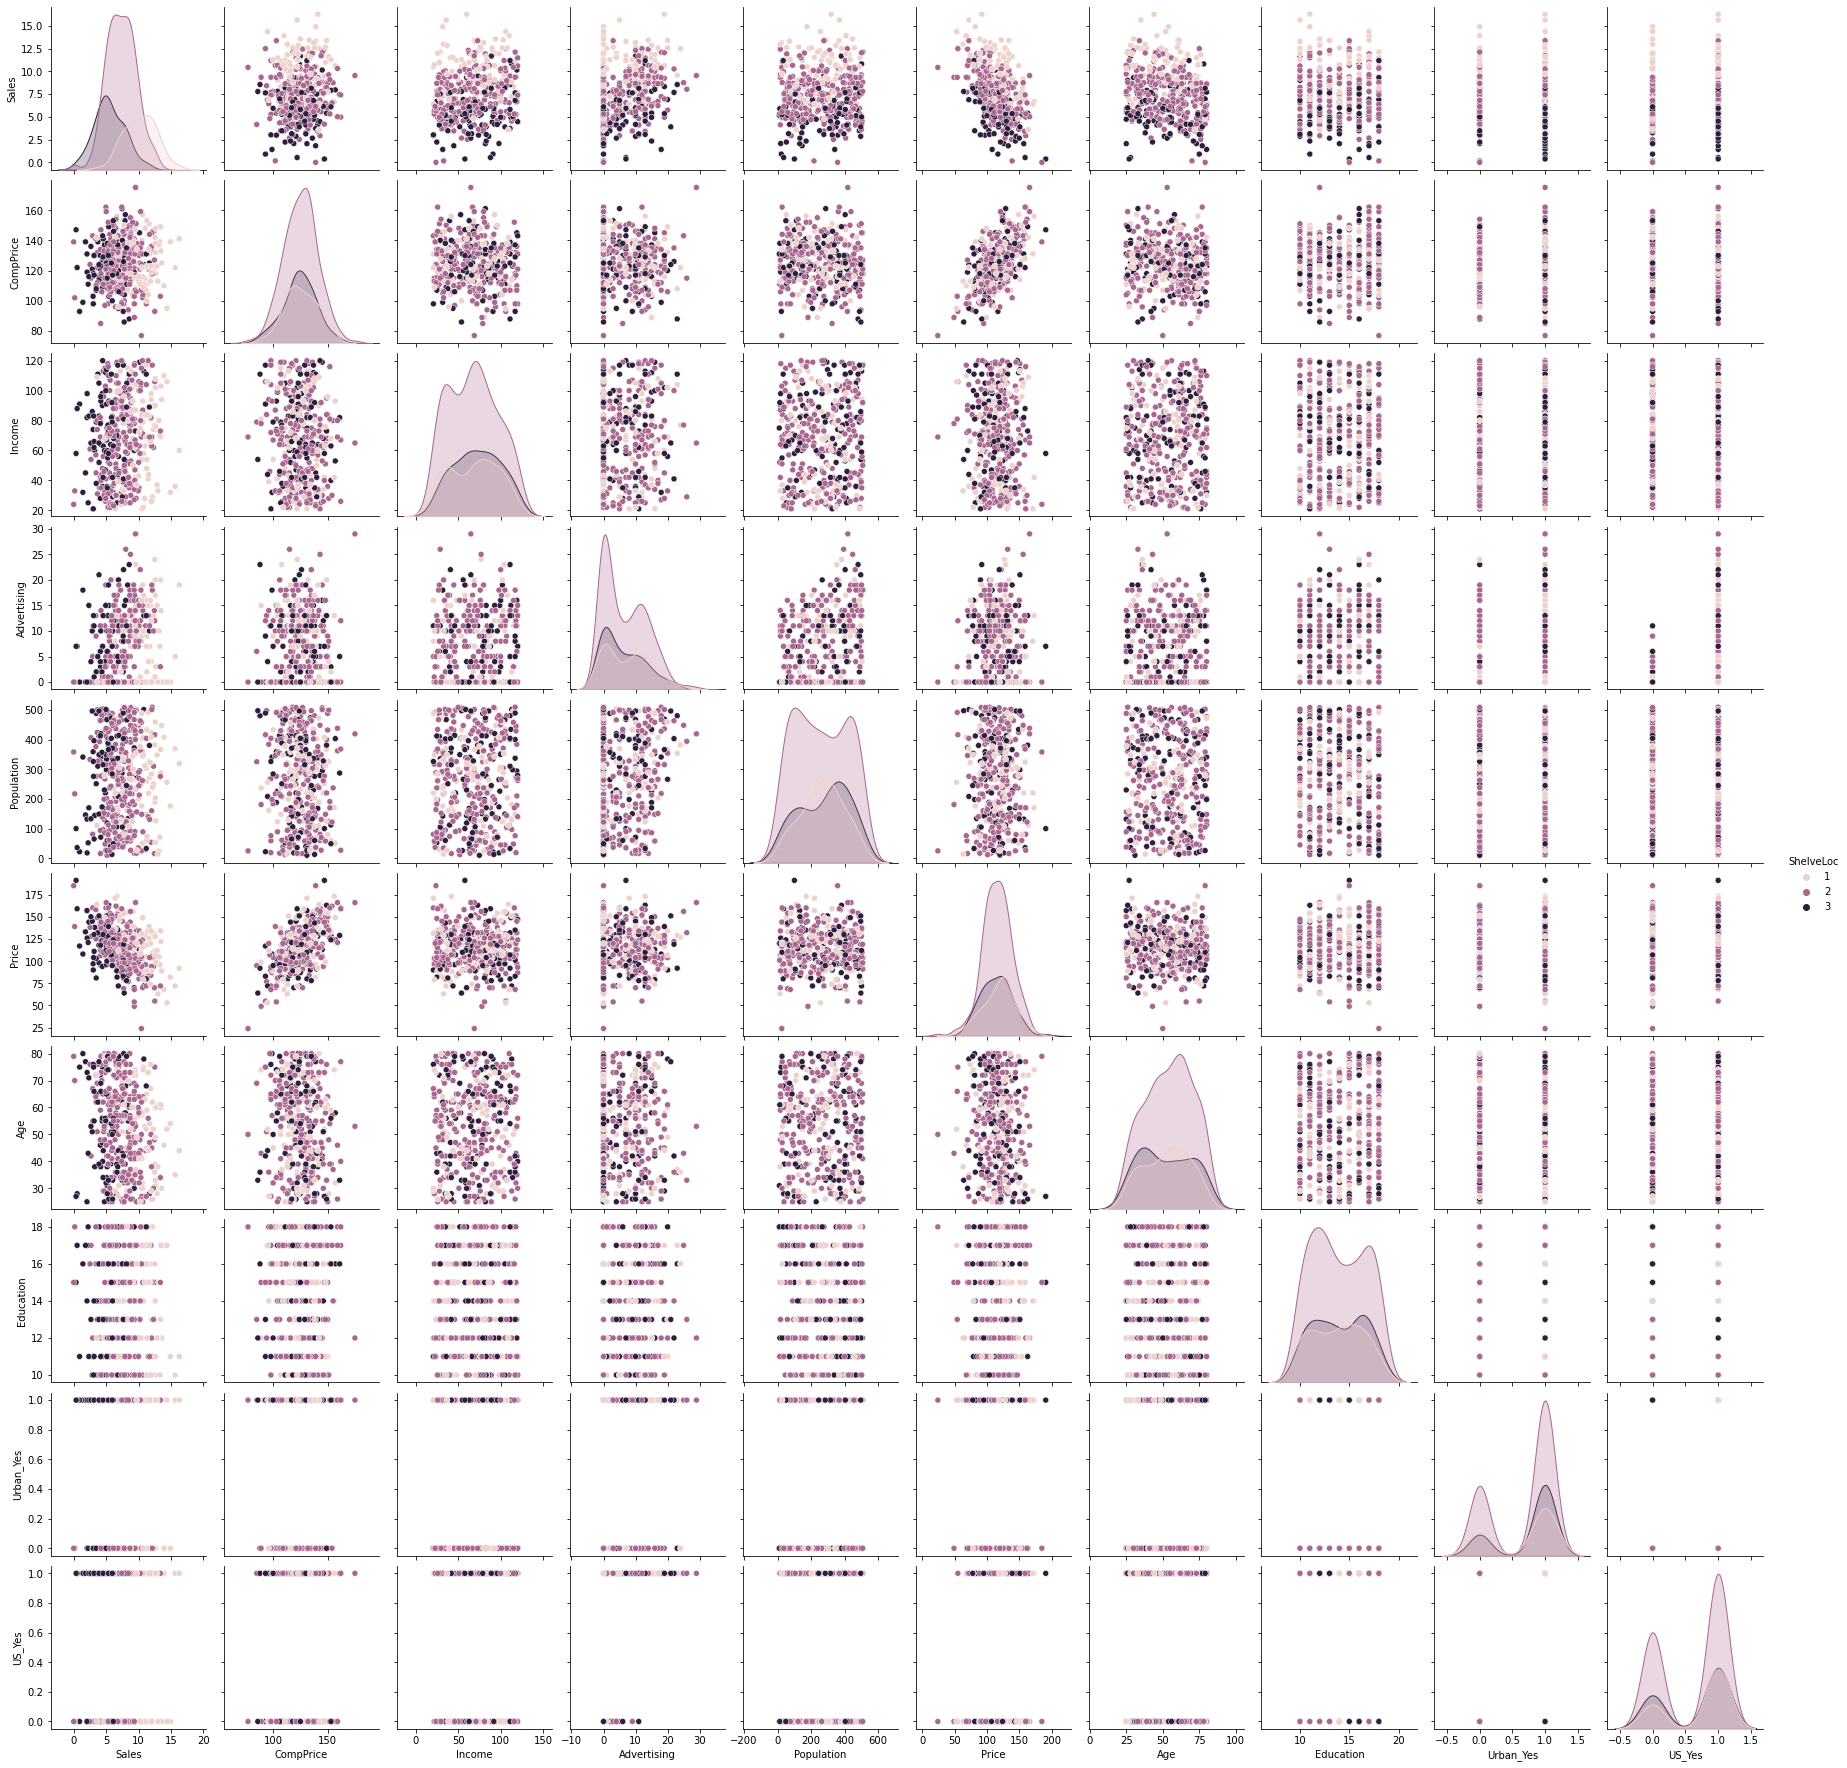

In [8]:
sns.pairplot(data=df, hue = 'ShelveLoc')

In [9]:
x=df.iloc[:,0:6]
y=df['ShelveLoc']

In [10]:
#split data for train and test

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

# Building Decision Tree Classifier using Entropy Criteria

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=3,splitter='random')
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
pd.Series(ypred).value_counts()

2    47
3    22
1    11
dtype: int64

In [13]:
from sklearn.metrics import classification_report

In [14]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.64      0.47      0.54        15
           2       0.60      0.62      0.61        45
           3       0.36      0.40      0.38        20

    accuracy                           0.54        80
   macro avg       0.53      0.50      0.51        80
weighted avg       0.55      0.54      0.54        80



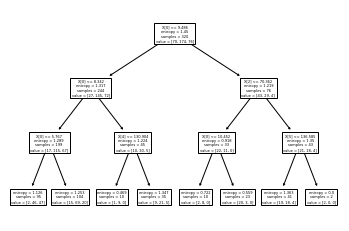

In [15]:
#PLot the decision tree
tree.plot_tree(dt);

In [16]:
np.mean(ypred==ytest)

0.5375

# Building Decision Tree Classifier (CART) using Gini Criteria

In [17]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=5,splitter='random')
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)


In [18]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.44      0.47      0.45        15
           2       0.62      0.71      0.66        45
           3       0.58      0.35      0.44        20

    accuracy                           0.57        80
   macro avg       0.55      0.51      0.52        80
weighted avg       0.57      0.57      0.57        80



In [19]:
np.mean(ypred==ytest)

0.575